**Mateo Contreras** 

*Decision trees*

__Objective__ : Make an introductory project regarding implementation and interpretation of decision trees.



**Step 1**. Import the packages we will need for the implementation of the decision tree.

**Standar libraries:**

Numpy for linear algebra

Pandas for Data proccesing and CSV reading.

**Machine learning library:**

Sci-kit Learn

Sci-kit learn is the main library used for machine learning and it has a decision tree model implemented.

Another important feature is  train_test_split which allows us to split the data in two sets: train and test.

We will have to evaluate the model after the training and for that matter sci-kit has metrics in order to evaluate how good the model is.

**Plot library**

Matplotlib

Seaborn

In [223]:
import pandas as pd
import numpy as np


In [224]:
from sklearn.model_selection import train_test_split # Para partir la base de datos en train y test
from sklearn import tree
from sklearn import metrics
from  sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns

**Step 2.** Import the data.

The data used for this project was obtain from kaggle and will be available for download in the data file from the repository.

In [225]:
%cd "C:\Users\Mateo\OneDrive\Documentos\Programacion\github\Introduction-to-decision-trees\raw_data"
# Cargamos la base de datos del titanic
titanic = pd.read_csv("titanic.csv")
titanic
#To make it easier to reach out for any column, all of them should be in lower case.

C:\Users\Mateo\OneDrive\Documentos\Programacion\github\Introduction-to-decision-trees\raw_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [226]:
# Cambiamos los nombres de las columnas a minusculas
titanic.columns = titanic.columns.str.lower()
titanic

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Step 3.** Data exploration.

Data exploration is the first step in data analysis which involves the use of data visualization and statistical methods.

In [227]:
# Let's see the first 5 rows of the data set.
titanic.head(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [228]:
#And  the shape of the dataframe.

titanic.shape
#(891,12) means there are 891 people (also knows as entries) who embarked the Titanic and 12 different characteristics of each one.

(891, 12)

### Base variables and definitions

| Variable    | Definition                       | Unique values                                                          | 
| :---------: | :-------:                        | :-------:                                                           |
| passengerid | Unique identifier by passenger |                                                                     |
| survived	  | ¿Did the passenger survive?         | 0 = No, 1 = Sí                                                      |
| pclass      | Ticket type               | 1 = 1st (First class), 2 = 2nd (Second class), 3 = 3rd (Third class)|
| name        | Passenger name           |                                                                     |
| sex         | Passenger sex              | male, female                                                        |
| age         | Passenger age               |                                                                     |
| sibsp       | # number of siblings or partners on board |                                                                     |
| parch       | # parents or children on board      |                                                                     |
| ticket      | Ticker number               |                                                                     |
| fare        | Ticker fare                  |                                                                     |
| cabin       | Cabin number               |                                                                     |
| embarked    | Port of embarkation       | C = Cherbourg, Q = Queenstown, S = Southampton                      |

In [229]:
#As each entry is unique to a single passenger, we can drop ID, name and ticket variables as they won't be of use for the analysis.
titanic.drop(columns=["passengerid", "name", "ticket"], inplace=True)

#We will keep the other 9 variables

In [230]:
# Analizamos los tipos de las variables
#Let's see the type of the variables.
titanic.info()

#204 non null in the cabin variable is a clear indicator it can be used for further analysis as it misses more than half the entries
#and therefore cannot be used for statistical inference.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   cabin     204 non-null    object 
 8   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


What if we want to know how many missing values has each variable?


In [231]:
#The method isna() sets a 0 if there is not a missing value and a 1 is there is.
titanic.isna()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [232]:
#The next step is to sum all the missing values per column (axis=0) and afterwards divide by total rows(titanic.shape[0])

titanic.isna().sum(axis=0)/titanic.shape[0]

#The result is the % of missing values per column.

survived    0.000000
pclass      0.000000
sex         0.000000
age         0.198653
sibsp       0.000000
parch       0.000000
fare        0.000000
cabin       0.771044
embarked    0.002245
dtype: float64

In [233]:
#Cabin variable has around 77% missing values, age almost 20% and embarked less than 1%. As was discussed earlier, cabin should be
#eliminated as it is not useful for analysis. 

titanic.drop(columns=["cabin"], inplace=True)

Now the distribution of some variables

In [234]:
#How many survived
didnt = len(titanic[titanic.survived==0])
did = len(titanic[titanic.survived==1])

print("A total of", didnt, "didnt survive")
print("A total of", did, "survived")


A total of 549 didnt survive
A total of 342 survived


<AxesSubplot:ylabel='survived'>

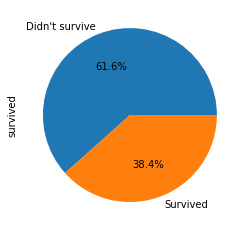

In [235]:
titanic.survived.value_counts().rename({0:"Didn't survive",1:"Survived"}).plot(kind="pie",autopct="%0.1f%%")

In [236]:
#How man and women were there
males = len(titanic[titanic.sex=="male"])
females = len(titanic[titanic.sex=="female"])

print("There were", males, "males")
print("There were", females, "females")

There were 577 males
There were 314 females


<AxesSubplot:ylabel='sex'>

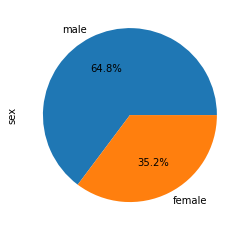

In [237]:
titanic.sex.value_counts().plot(kind="pie",autopct="%0.1f%%")

In [238]:
#Where did they embark from
Southampton, Cherbourg , Queenstown =titanic.embarked.value_counts()
print("A total of", Southampton ,"people embarked in Southampton,", Cherbourg, "in Cherbourg and", Queenstown, "in Queenstown.")

A total of 644 people embarked in Southampton, 168 in Cherbourg and 77 in Queenstown.


<AxesSubplot:ylabel='embarked'>

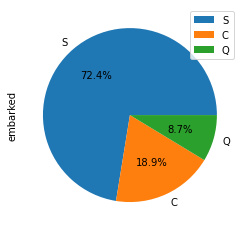

In [239]:
titanic.embarked.value_counts().rename({Southampton:"Southampton",Cherbourg:"Cherbourg",Queenstown:"Queenstown"}).plot(kind="pie",autopct="%0.1f%%",legend=(["Southampton","Cherbourg","Queenstown"]))

Text(0.5, 0, 'gender')

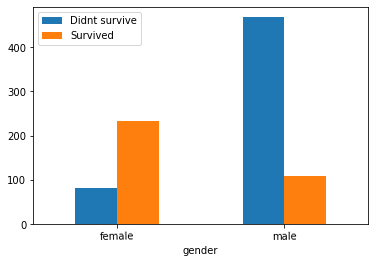

In [240]:
#Survival rate by gender
pd.crosstab(titanic.sex,titanic.survived).plot(kind="bar")
plt.xticks(rotation=1)
plt.legend(["Didnt survive","Survived"])
plt.xlabel("gender")


Text(0.5, 0, 'Ticket class')

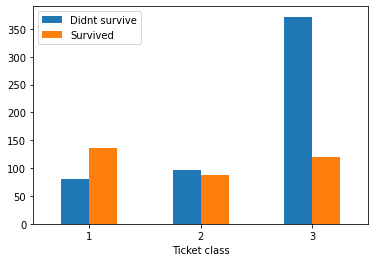

In [241]:
#How about ticket class and total survival
pd.crosstab(titanic.pclass,titanic.survived).plot(kind="bar")
plt.xticks(rotation=1)
plt.legend(["Didnt survive","Survived"])
plt.xlabel("Ticket class")

**Step 4.** Prepare the variables for the implementation of the model.

Some categorical variables such as Sex, Pclass and Embarked have to be transformed into dummy in order to allow for interpretation.

In [242]:
titanic_dummies = pd.get_dummies(titanic,columns=["pclass","sex","embarked"])
titanic_dummies

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [243]:
#How many new variables have been created?
print(titanic.shape)
titanic_dummies.shape

#5 new variables: 2 for each sex, 3 for embarked and 3 for each cabin class.

(891, 8)


(891, 13)

Now we have to split the data in two sets: the train sample will be used as an input for the model to learn and the test sample to evaluate the predictions. As mentiones above, the library required is sci-kit.

In [244]:
x_train, x_test, y_train, y_test = train_test_split(titanic_dummies.drop(columns=["survived"]),
    titanic_dummies.survived,test_size=0.3,random_state=123,stratify=titanic_dummies.survived)

# We want to separate the independent variables (such as pclass) from the dependent variable
# we want to predict (survived). That is why the first data set does not have the survived 
# column, whereas the second data set has this information.

# Test_size is the parameter we can acommodate to the needs of the investigator and
# it sets how many observations are stored for the evaluation.

# Random_state allows the replicability of the model as it sets a seed to tell the machine
# how to split the samples.

# Lastly, stratify makes a split so the proportion of the variable of interest (survived)
# is the same in the test and train data.

As there are empty observations in some variables, they must be filled with in order to implement the model. 

In [245]:
# In order to erase all the NA in age they will be
# filled with the mean age of all the passengers (from 
#  the train sample)
mean_age = x_train.age.mean()
print(mean_age)

x_train["age"] = x_train.age.fillna(mean_age)

# The same process will be executed but for the test
# sample
x_test["age"] = x_test.age.fillna(mean_age)


28.941457085828343


In [246]:
# A similar procedure with the variable embarked. However
# there is no mean of a categorical variable, so 
# the metric that should be used is mode.

# The port from which the most people embarked shall be
# the one that we will asume the people who lack this
# information came from.

embarked_mode = titanic.loc[x_train.index, "embarked"].mode()[0]
print(embarked_mode)
# Most people embarked in Southampton.

# Next step is to know where are the missing values.
embarked_nan_indexes = titanic[titanic.embarked.isna()].index
embarked_nan_indexes

S


Int64Index([61, 829], dtype='int64')

In [247]:
titanic.iloc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [248]:
x_test.loc[[61]]

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
61,38.0,0,0,80.0,1,0,0,1,0,0,0,0


In [249]:
x_train.loc[[829]]

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
829,62.0,0,0,80.0,1,0,0,1,0,0,0,0


In [250]:
#Note: ILOC v LOC
# ILOC goes for the index in the "sub"dataframe, if used it will search for
# the 61th observation which is not the same as the 61th observation from the
# original dataframe (titanic). However, if LOC is used, it will look through 
# the "sub"data frame for the 61th obs.

In [251]:
# The method below goes into the x_train dataframe and reviews if
# any of its indexes is in the embarked_nan_indexes. If they do so,
# it looks for the embarked mode and changes it to 1.

x_train.loc[x_train.index.isin(embarked_nan_indexes),f'embarked_{embarked_mode}']=1
x_test.loc[x_test.index.isin(embarked_nan_indexes),f'embarked_{embarked_mode}']=1

In [252]:
print(x_test.loc[[61]])
print(x_train.loc[[829]])

     age  sibsp  parch  fare  pclass_1  pclass_2  pclass_3  sex_female  \
61  38.0      0      0  80.0         1         0         0           1   

    sex_male  embarked_C  embarked_Q  embarked_S  
61         0           0           0           1  
      age  sibsp  parch  fare  pclass_1  pclass_2  pclass_3  sex_female  \
829  62.0      0      0  80.0         1         0         0           1   

     sex_male  embarked_C  embarked_Q  embarked_S  
829         0           0           0           1  


In [253]:
print(x_train.isna().sum())
print(x_test.isna().sum())

#Finally there is not a single NAN value.

age           0
sibsp         0
parch         0
fare          0
pclass_1      0
pclass_2      0
pclass_3      0
sex_female    0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64
age           0
sibsp         0
parch         0
fare          0
pclass_1      0
pclass_2      0
pclass_3      0
sex_female    0
sex_male      0
embarked_C    0
embarked_Q    0
embarked_S    0
dtype: int64


**Step 5.** Classification model.

In [254]:
# Declare the classification model that will be used. In this case, decision tree.

clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=100)

# Random_state was explained previously.

# min_samples_leaf is the minimum number of samples required to 
# be a leaf node



In [255]:
# Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=100, random_state=123)

**Step 6.** Model evaluation.

In [256]:
%cd "C:\Users\Mateo\OneDrive\Documentos\Programacion\github\Introduction-to-decision-trees\results"


y_predicted = clf.predict(x_test)

results = metrics.classification_report(y_test,y_predicted)
print(results)

C:\Users\Mateo\OneDrive\Documentos\Programacion\github\Introduction-to-decision-trees\results
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.71      0.64      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [257]:
# In order to export the previous dataframe I used the pandas classification report function
# which I found in stackoverflow.


def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)
    
    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)
    
    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total
    
    class_report_df['avg / total'] = avg

    return class_report_df.T


In [258]:
df_class = pandas_classification_report(y_true=y_test,y_pred=y_predicted)
print(df_class)
df_class.to_excel("results.xlsx")

             precision    recall  f1-score  support
0             0.788571  0.836364  0.811765    165.0
1             0.709677  0.640777  0.673469    103.0
avg / total   0.758250  0.761194  0.758614    268.0


{0: 'age', 1: 'sibsp', 2: 'parch', 3: 'fare', 4: 'pclass_1', 5: 'pclass_2', 6: 'pclass_3', 7: 'sex_female', 8: 'sex_male', 9: 'embarked_C', 10: 'embarked_Q', 11: 'embarked_S'}


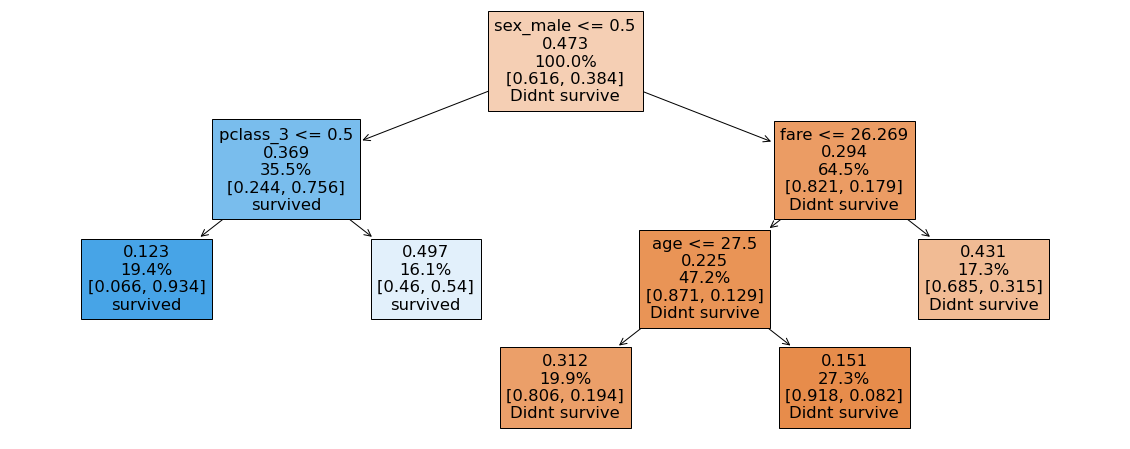

In [259]:
# Let's declare a dictonary containing all the information about
# the features.
print(dict(enumerate(x_train.columns)))

# Now we will plot the resulting tree.

fig = plt.figure(figsize=(20,8))

tree.plot_tree(clf,feature_names=list(x_train.columns),filled=True, label="none",
proportion=True,class_names=["Didnt survive","survived"])

fig.savefig( "tree.png",format="png",bbox_inches="tight")